# Re-doing what Albert did for his thesis but with only DNASU dataset and only those proteins that are from Human

## Loading packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import statistics
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Loading Data and splitting it into train, test and validation 

In [9]:
df = pd.read_csv("DNASU_HUMAN.csv", sep=',', index_col=0)


In [10]:
def get_df_ML(df,features):
    temp_df = df[features]
    return temp_df

In [11]:
# DNASU_features = ['Binary_Solubility','charge_at_7','Turn_NPGS_fraction','Cysteine_fraction','Proline_fraction','Gravy_Score','Total_Residues']
# df_DNASU = get_df_ML(df,DNASU_features)
# df_DNASU

In [12]:
def get_normalised_df(df):
    df_min_max_scaled = df.copy()

    # apply normalization to all columns
    for column in df_min_max_scaled:
        if column != 'Binary_Solubility':
            df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

    return df_min_max_scaled

In [13]:
# Final_DNASU_ML = get_normalised_df(df_DNASU)#TRAINING DATASET
# Final_DNASU_ML
df = df.select_dtypes(['number'])
Final_DNASU_ML = get_normalised_df(df)#TRAINING DATASET

Final_DNASU_ML.isnull().sum()
Final_DNASU_ML = Final_DNASU_ML.drop(["HUMAN"], axis = 1)
Final_DNASU_ML


,Binary_Solubility,Molecular_Weight,Aromaticity,Instability_index,Gravy_Score,Isoelectric_point,charge_at_7,Mean_flexibility,A,C,...,R,S,T,V,W,Y,Total_Residues,Proline_fraction,Cysteine_fraction,Turn_NPGS_fraction
0,0,0.262589,0.561576,0.508327,0.839831,0.241971,0.404212,0.345188,0.144928,0.166667,...,0.10,0.343284,0.119403,0.240741,0.10,0.142857,0.265372,0.226261,0.212808,0.735658
1,1,0.186849,0.365385,0.477256,0.734094,0.635404,0.528534,0.344294,0.173913,0.111111,...,0.24,0.059701,0.134328,0.240741,0.10,0.085714,0.189320,0.331233,0.184615,0.510090
2,1,0.906724,0.418259,0.488758,0.662833,0.635867,0.645028,0.514705,0.739130,0.277778,...,0.72,0.388060,0.402985,0.407407,0.05,0.571429,0.885113,0.244939,0.122867,0.490806
3,0,0.308783,0.520435,0.415811,0.616257,0.252586,0.416201,0.497391,0.217391,0.055556,...,0.20,0.208955,0.283582,0.222222,0.25,0.314286,0.309061,0.324513,0.062609,0.600166
4,0,0.470235,0.606383,0.609706,0.705289,0.244708,0.394113,0.464282,0.202899,0.111111,...,0.18,0.552239,0.432836,0.425926,0.35,0.457143,0.469256,0.279216,0.087538,0.656426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,1,0.272082,0.538806,0.618015,0.671265,0.063676,0.237448,0.502241,0.144928,0.111111,...,0.12,0.119403,0.194030,0.203704,0.20,0.142857,0.262136,0.399897,0.143284,0.484907
2815,1,0.274285,0.645813,0.457092,0.729145,0.699824,0.557107,0.263998,0.275362,0.083333,...,0.38,0.149254,0.164179,0.092593,0.30,0.171429,0.265372,0.395957,0.106404,0.509510
2816,1,0.454357,0.664078,0.446579,0.741788,0.727497,0.634919,0.257495,0.420290,0.138889,...,0.60,0.194030,0.238806,0.240741,0.45,0.285714,0.436893,0.315869,0.116505,0.495995
2817,1,0.279211,0.436364,0.465539,0.658630,0.741895,0.546998,0.330100,0.304348,0.027778,...,0.42,0.179104,0.104478,0.277778,0.30,0.114286,0.275081,0.274707,0.034450,0.507274


In [14]:
df_train, df_test_val = train_test_split(Final_DNASU_ML, test_size=0.2)
df_test, df_val = train_test_split(df_test_val, test_size=0.5)
df_train =df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
print(len(df_train), len(df_test), len(df_val))

2255 282 282


In [15]:
#Labels are the values to be predicted, in this case the solubility
Train_labels = np.array(df_train['Binary_Solubility'])

# Remove the labels from the features
Train_features= df_train.drop('Binary_Solubility', axis = 1)

# Saving feature names for later use
Train_feature_list = list(Train_features.columns)

# Convert to numpy array
Train_features = np.array(Train_features)


#Same thing for test set
Test_labels = np.array(df_test['Binary_Solubility'])
Test_features = df_test.drop('Binary_Solubility', axis = 1)
Test_feature_list = list(Test_features.columns)
Test_features = np.array(Test_features)

#And the cleaned test set
Test_labels2 = np.array(df_val['Binary_Solubility'])
Test_features2 = df_val.drop('Binary_Solubility', axis = 1)
Test_feature_list2 = list(Test_features2.columns)
Test_features2 = np.array(Test_features2)

#Check shape of train and test
print('Training Features Shape:', Train_features.shape)
print('Training Labels Shape:', Train_labels.shape)
print('Testing Features Shape:', Test_features.shape)
print('Testing Labels Shape:', Test_labels.shape)
print('Cleaned testing Features Shape:', Test_features2.shape)
print('Cleaned testing Labels Shape:', Test_labels2.shape)


Training Features Shape: (2255, 31)
Training Labels Shape: (2255,)
Testing Features Shape: (282, 31)
Testing Labels Shape: (282,)
Cleaned testing Features Shape: (282, 31)
Cleaned testing Labels Shape: (282,)


## Training the Model and predicting solubility

In [16]:
#Support vector
svc = SVC(random_state=42)
svc.fit(Train_features, Train_labels)

#random forest
rf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt')
rf.fit(Train_features, Train_labels)

#Logistic regression
lr = LogisticRegression()
lr.fit(Train_features, Train_labels)

LogisticRegression()

In [17]:
# Use the forest's predict method on the test data
rf_predictions = rf.predict(Test_features)

# Probabilities for each class
rf_probs = rf.predict_proba(Test_features)[:, 1]

#same for cleaned test set
rf_predictions2 = rf.predict(Test_features2)
rf_probs2 = rf.predict_proba(Test_features2)[:, 1]

In [18]:
# Calculate roc auc 
roc_value = roc_auc_score(Test_labels, rf_probs)
print('AUC:', roc_value)

#same for cleaned
roc_value = roc_auc_score(Test_labels2, rf_probs2)
print('AUC:', roc_value)

AUC: 0.8439018218623482
AUC: 0.8426267630554573


In [19]:
def get_AUC(model, x_train, x_test, y_train, y_test):
    rf = model.fit(x_train, y_train)
    rf_predictions = rf.predict(x_test)
    rf_probs = rf.predict_proba(x_test)[:, 1]
    roc_value = roc_auc_score(y_test, rf_probs)
    return roc_value

In [20]:
# Extract feature importances
fi = pd.DataFrame({'feature': (Train_feature_list),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi[:10]

,feature,importance
3,Gravy_Score,0.077731
6,Mean_flexibility,0.074403
16,L,0.044484
4,Isoelectric_point,0.042405
1,Aromaticity,0.041314
29,Cysteine_fraction,0.038106
5,charge_at_7,0.037414
2,Instability_index,0.035978
22,S,0.034963
27,Total_Residues,0.034687


## Making plots of the results 

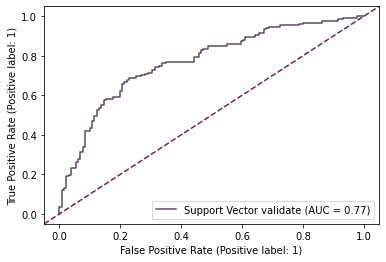

In [21]:
sns.set_palette("rocket")
ax = plt.gca()
svc_disp2 = plot_roc_curve(svc, Test_features2, Test_labels2,name='Support Vector validate', ax=ax, alpha=0.8)
ax.plot([0, 1], [0, 1],linestyle='--', transform=ax.transAxes)
plt.show()

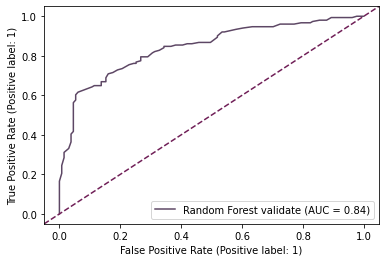

In [22]:
ax = plt.gca()
rf_disp2 = plot_roc_curve(rf, Test_features2, Test_labels2,name='Random Forest validate', ax=ax, alpha=0.8)
ax.plot([0, 1], [0, 1],linestyle='--', transform=ax.transAxes)
plt.show()

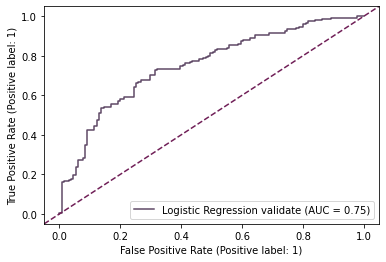

In [23]:
ax = plt.gca()
svc_disp2 = plot_roc_curve(lr, Test_features2, Test_labels2,name='Logistic Regression validate', ax=ax, alpha=0.8)
ax.plot([0, 1], [0, 1],linestyle='--', transform=ax.transAxes)
plt.show()

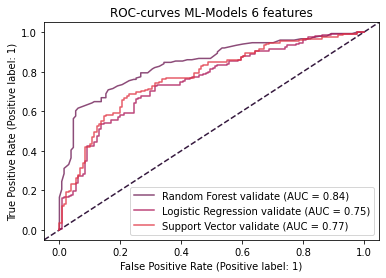

In [24]:
ax = plt.gca()
ax.plot([0, 1], [0, 1],linestyle='--', transform=ax.transAxes)
rf_disp = plot_roc_curve(rf, Test_features2, Test_labels2,name='Random Forest validate', ax=ax, alpha=0.8)
lr_disp = plot_roc_curve(lr, Test_features2, Test_labels2,name='Logistic Regression validate', ax=ax, alpha=0.8)
svc_disp = plot_roc_curve(svc, Test_features2, Test_labels2,name='Support Vector validate', ax=ax, alpha=0.8)
plt.title('ROC-curves ML-Models 6 features')
plt.show()

## Stratified 10- fold cross validation: AUC

In [25]:
from sklearn.model_selection import train_test_split
SOLtarget = np.array(df_train['Binary_Solubility'])
SOLdata = np.array(Train_features)

In [26]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)
    

In [27]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 10)

In [28]:
AUC_rf = []
for train_index,test_index in kf.split(SOLdata, SOLtarget):
    x_train, x_test, y_train, y_test = SOLdata[train_index], SOLdata[test_index], \
                                        SOLtarget[train_index], SOLtarget[test_index]
    model = LogisticRegression()
    AUC_rf.append(get_AUC(model, x_train, x_test, y_train, y_test))
print("Mean AUC score:")
print(np.mean(AUC_rf))

Mean AUC score:
0.7594003004128825


## 10 fold cross validation: score

In [29]:
print(np.mean(cross_val_score(LogisticRegression(),SOLdata,SOLtarget,scoring= 'roc_auc',cv=10)))
print(np.mean(cross_val_score(SVC(),SOLdata,SOLtarget,scoring= 'roc_auc',cv=10)))
print(np.mean(cross_val_score(RandomForestClassifier(n_estimators = 100),SOLdata,SOLtarget,scoring= 'roc_auc',cv=10)))

0.7594003004128825
0.7783814805237912
0.8349127381952604


In [30]:
d = {'Model': ['Logistic Regression', 
                   'Support Vector', 'Random Forest'],
        'AUC':[0.7569997066969624, 0.7796824190198975, 0.835677095631641]}
df = pd.DataFrame(data=d)

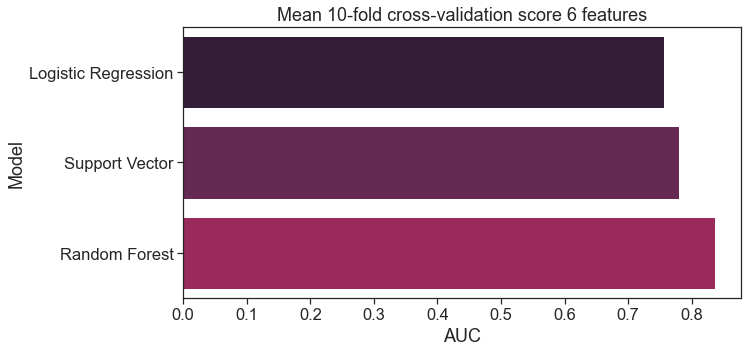

In [31]:
sns.set(style=("ticks"), font_scale=1.5)
sns.set_palette("rocket")
fig = plt.figure(figsize=(10, 5))
ax = sns.barplot(x="AUC", y="Model", data=df, ).set_title('Mean 10-fold cross-validation score 6 features')